<a href="https://colab.research.google.com/github/bigyapti/predict_health_costs_with_regression/blob/main/predict_health_costs_with_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
dataset.tail()

--2024-01-03 16:40:19--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.2.33, 172.67.70.149, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.2.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  49.09K  --.-KB/s    in 0s      

2024-01-03 16:40:20 (102 MB/s) - ‘insurance.csv’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [3]:
CATEGORICAL_COLUMNS = ['sex', 'smoker', 'region']

for column in CATEGORICAL_COLUMNS:
  dataset[column] = dataset[column].astype('category').cat.codes

In [4]:
train_dataset, test_dataset = np.split(dataset, [int(.8 * len(dataset))])

In [5]:
train_labels, test_labels = train_dataset.pop('expenses'), test_dataset.pop('expenses')

In [6]:
normalizer = layers.experimental.preprocessing.Normalization(axis=-1)
normalizer.adapt(np.array(train_dataset))

In [7]:
model = keras.Sequential([
                          normalizer,
                          layers.Dense(32, activation="relu"),
                          layers.Dense(16, activation="relu"),
                          layers.Dense(1)
])

model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mae',
    metrics=['mae', 'mse']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 6)                 13        
 on)                                                             
                                                                 
 dense (Dense)               (None, 32)                224       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 782 (3.06 KB)
Trainable params: 769 (3.00 KB)
Non-trainable params: 13 (56.00 Byte)
_________________________________________________________________


In [8]:
model.fit(train_dataset, train_labels, epochs=100, validation_split=0.2)

Epoch 1/100
27/27 [==============================] - 1s 12ms/step - loss: 12091.3916 - mae: 12091.3916 - mse: 289818656.0000 - val_loss: 8488.5762 - val_mae: 8488.5762 - val_mse: 183688400.0000
Epoch 2/100
27/27 [==============================] - 0s 3ms/step - loss: 5580.4404 - mae: 5580.4404 - mse: 97045024.0000 - val_loss: 4070.0415 - val_mae: 4070.0415 - val_mse: 48756712.0000
Epoch 3/100
27/27 [==============================] - 0s 3ms/step - loss: 3392.3677 - mae: 3392.3677 - mse: 38427580.0000 - val_loss: 3761.9812 - val_mae: 3761.9812 - val_mse: 54245648.0000
Epoch 4/100
27/27 [==============================] - 0s 3ms/step - loss: 3109.1218 - mae: 3109.1218 - mse: 41766012.0000 - val_loss: 3502.2793 - val_mae: 3502.2793 - val_mse: 47497312.0000
Epoch 5/100
27/27 [==============================] - 0s 3ms/step - loss: 3044.8845 - mae: 3044.8845 - mse: 40006492.0000 - val_loss: 3489.6694 - val_mae: 3489.6694 - val_mse: 49103132.0000
Epoch 6/100
27/27 [==============================]

9/9 - 0s - loss: 1997.9683 - mae: 1997.9683 - mse: 25584092.0000 - 126ms/epoch - 14ms/step
Testing set Mean Abs Error: 1997.97 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 3ms/step


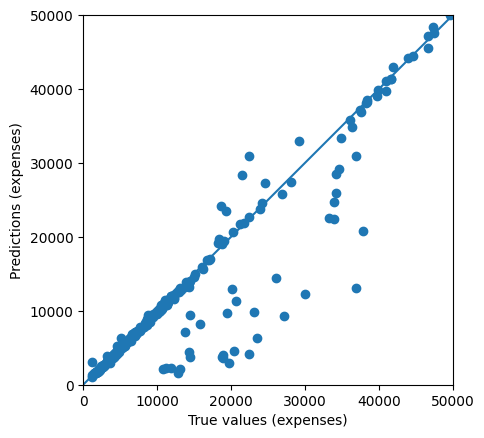

In [9]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
